# H&M数据可视化实战

## H&M数据集介绍

**数据集描述**

对于这个挑战，你将获得顾客在一段时间内的购买历史记录，以及相关的元数据。你的任务是预测在训练数据结束后的7天内，每个顾客将购买哪些商品。在这段时间内没有进行任何购买的顾客将被排除在评分之外。

**文件**

- `images/`：包含与每个商品ID对应的图片的文件夹；图片被放置在以商品ID的前三位数字命名的子文件夹中；请注意，并非所有的商品ID值都有对应的图片。

- `articles.csv`：每个可购买商品ID的详细元数据。

- `customers.csv`：数据集中每个顾客ID的元数据。

- `transactions_train.csv`：训练数据，包括每个日期每个顾客的购买记录，以及额外的信息。重复的行表示同一商品的多次购买。你的任务是预测在训练数据期间结束后的7天内，每个顾客将购买哪些商品。

**数据来源**

来自于Kaggle比赛:[H&M Personalized Fashion Recommendations](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud, STOPWORDS

# 设置要显示的行数和列数
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

In [2]:
# !pip install wordcloud

In [3]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

## Articles数据

这个表格包含了所有H&M的商品，包括产品类型、颜色、产品组和其他特征的详细信息。
商品数据描述：

- `article_id`：每个商品的唯一标识符。
- `product_code`、`prod_name`：每个产品及其名称的唯一标识符（不同）。
- `product_type`、`product_type_name`：`product_code`及其名称的产品组。
- `graphical_appearance_no`、`graphical_appearance_name`：图形及其名称的组别。
- `colour_group_code`、`colour_group_name`：颜色及其名称的组别。
- `perceived_colour_value_id`、`perceived_colour_value_name`、`perceived_colour_master_id`、`perceived_colour_master_name`：附加的颜色信息。
- `department_no`、`department_name`：每个部门及其名称的唯一标识符。
- `index_code`、`index_name`：每个指标及其名称的唯一标识符。
- `index_group_no`、`index_group_name`：一组指标及其名称。
- `section_no`、`section_name`：每个部分及其名称的唯一标识符。
- `garment_group_no`、`garment_group_name`：每个服装及其名称的唯一标识符。
- `detail_desc`：详细描述。描述是关于H&M商品的数据集。

In [40]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [41]:
cols = ['index_name','index_group_name']
for idx,col in enumerate(cols):
    print(idx,col)

0 index_name
1 index_group_name


In [43]:
for idx in range(len(cols)):
    print(idx,cols[idx])

0 index_name
1 index_group_name


In [42]:
for col in cols:
    print(col)

index_name
index_group_name


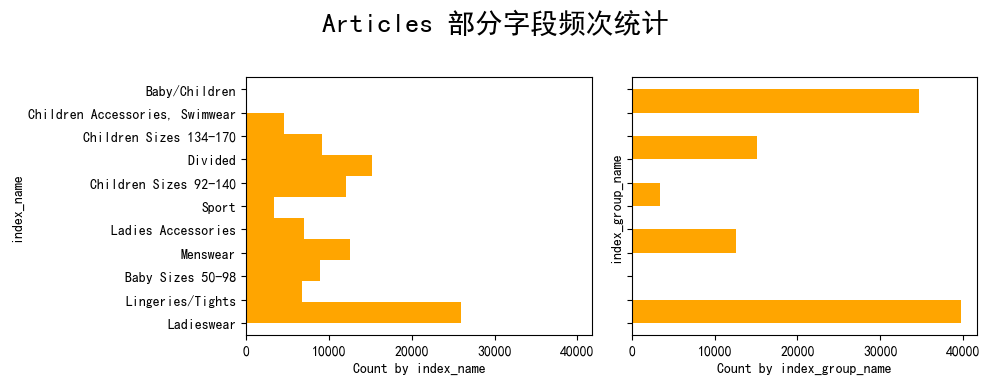

In [20]:
cols = ['index_name','index_group_name']
fig, axs = plt.subplots(1, len(cols), figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('Articles 部分字段频次统计', size=20)
for idx,col in enumerate(cols):
    axs[idx].hist(articles[col],orientation="horizontal",color='orange')
    axs[idx].set_xlabel(f'Count by {col}')
    axs[idx].set_ylabel(col)
# 调整布局以防止重叠
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [46]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

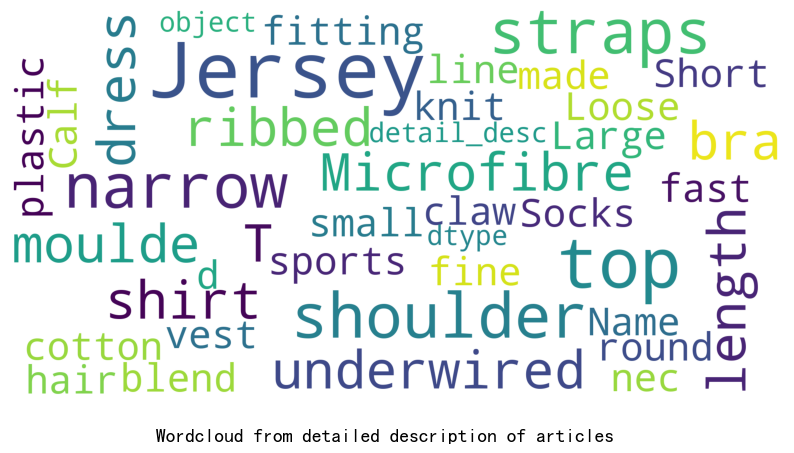

In [47]:
show_wordcloud(articles["detail_desc"], "Wordcloud from detailed description of articles")

## Customers数据

- `customer_id`：每位客户的唯一标识符
- `FN`：1 或 缺失
- `Active`：1 或 缺失
- `club_member_status`：会员俱乐部状态
- `fashion_news_frequency`：H&M 可以向客户发送新闻的频率
- `age`：当前年龄
- `postal_code`：客户的邮政编码

In [25]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


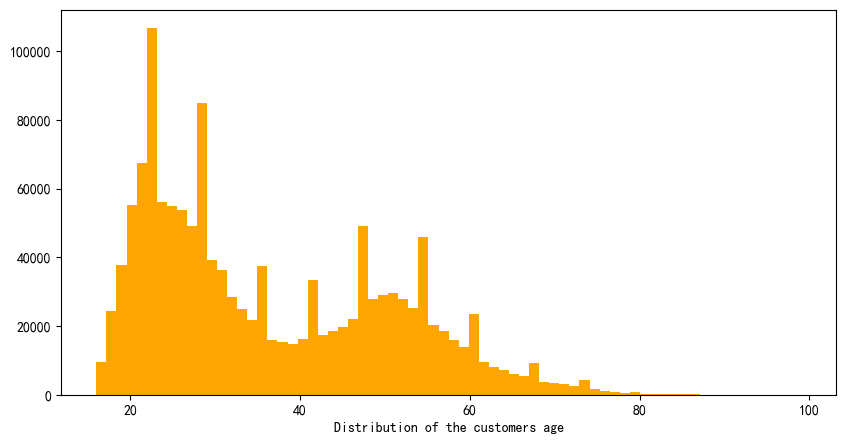

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(customers['age'],color='orange',bins=70)
ax.set_xlabel('Distribution of the customers age')
plt.show()

In [29]:
customers['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [48]:
customers['club_member_status']

0              ACTIVE
1              ACTIVE
2              ACTIVE
3              ACTIVE
4              ACTIVE
              ...    
1371975        ACTIVE
1371976        ACTIVE
1371977        ACTIVE
1371978        ACTIVE
1371979    PRE-CREATE
Name: club_member_status, Length: 1371980, dtype: object

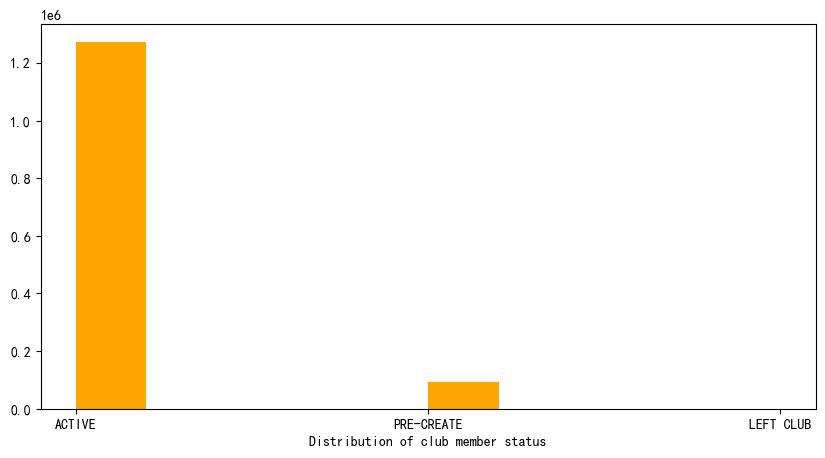

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(customers['club_member_status'].dropna(),color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

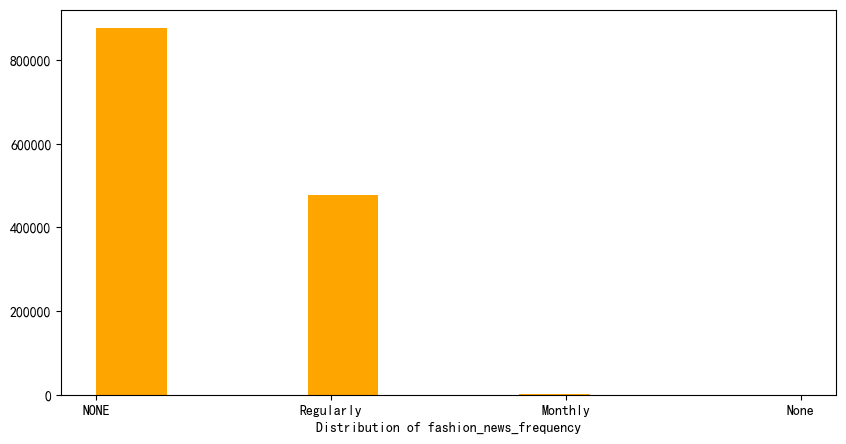

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(customers['fashion_news_frequency'].dropna(),color='orange')
ax.set_xlabel('Distribution of fashion_news_frequency')
plt.show()

## Transactions 数据

- `t_dat`：日期
- `customer_id`：每位客户的唯一标识符（在客户表中）
- `article_id`：每个商品的唯一标识符（在商品表中）
- `price`：购买价格
- `sales_channel_id`：销售渠道的标识符（1 或 2）

In [26]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


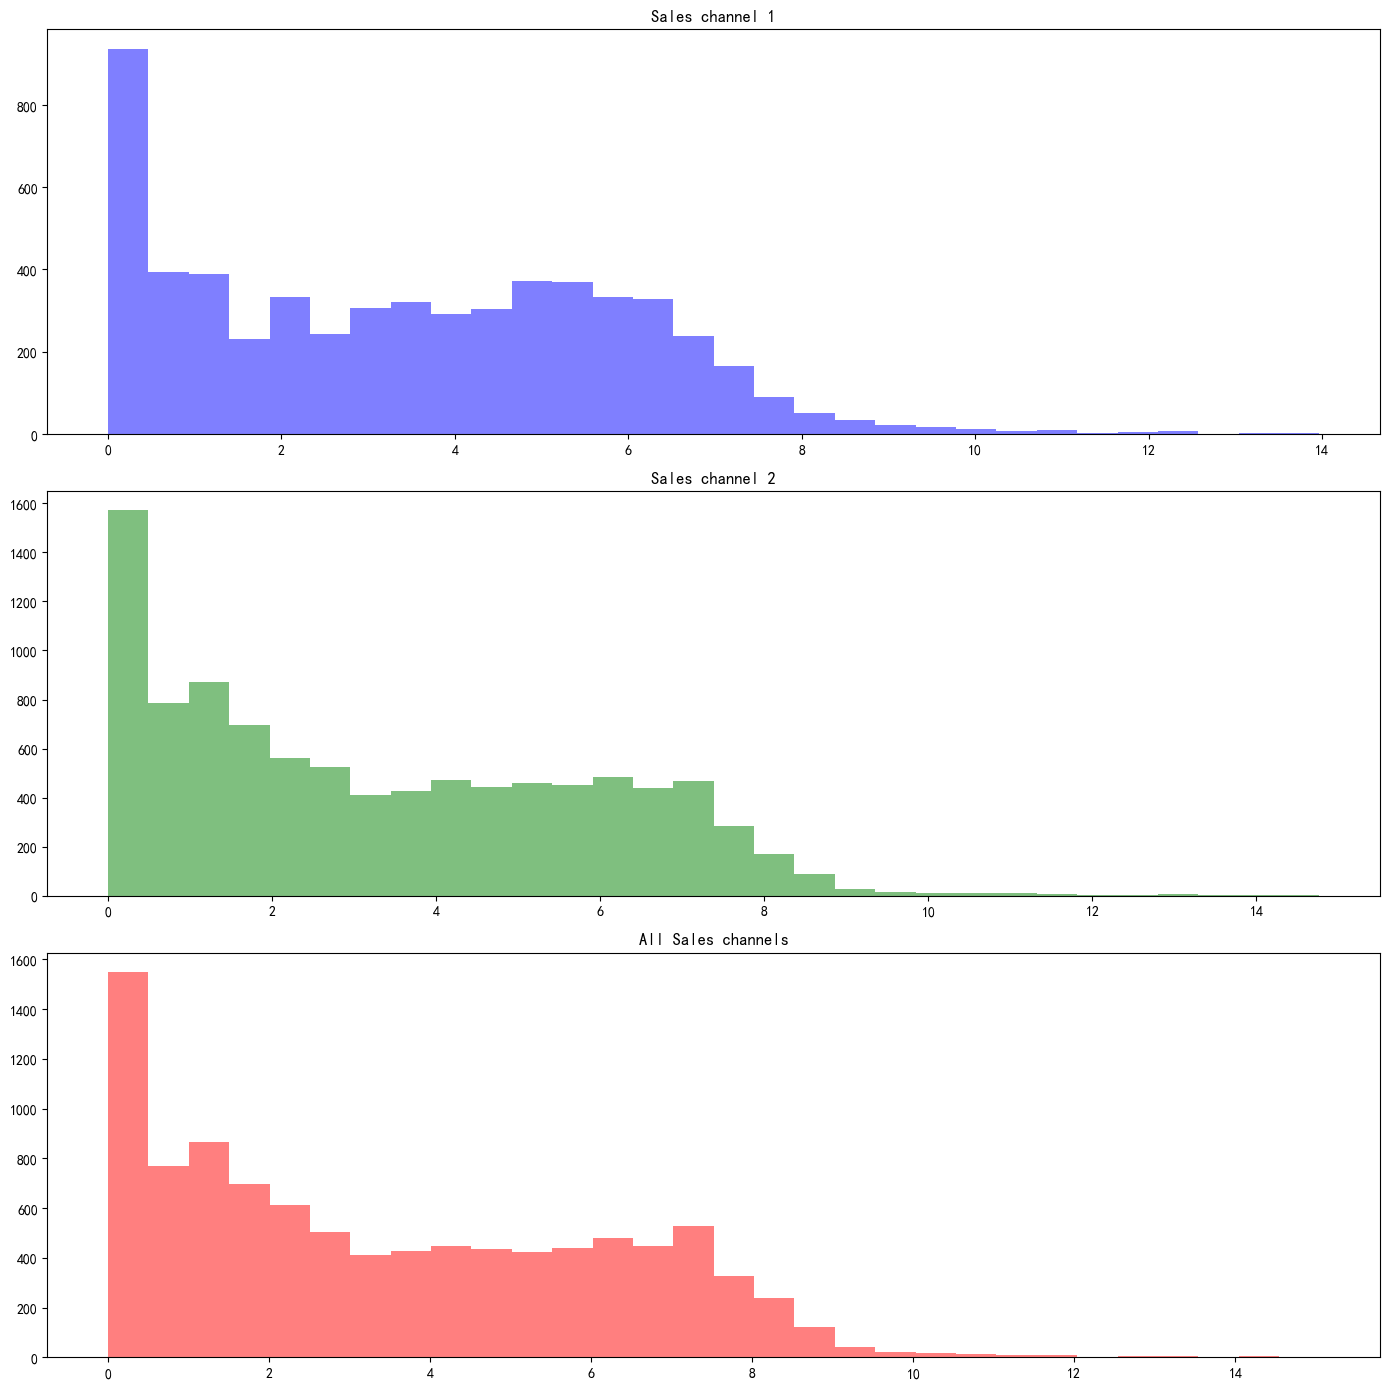

In [35]:
# 数据准备
data1 = np.log(transactions.loc[transactions["sales_channel_id"] == 1].price.value_counts())
data2 = np.log(transactions.loc[transactions["sales_channel_id"] == 2].price.value_counts())
data3 = np.log(transactions.price.value_counts())

# 创建分面图
fig, axs = plt.subplots(3, 1, figsize=(14, 14))  # 3个子图

# 子图1：销售渠道1
axs[0].hist(data1, bins=30, alpha=0.5,color='blue')
axs[0].set_title('Sales channel 1')

# 子图2：销售渠道2
axs[1].hist(data2, bins=30, alpha=0.5,color='green')
axs[1].set_title('Sales channel 2')

# 子图3：所有销售渠道
axs[2].hist(data3, bins=30, alpha=0.5,color='red')
axs[2].set_title('All Sales channels')

# 调整子图布局
plt.tight_layout()
plt.show()

In [27]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

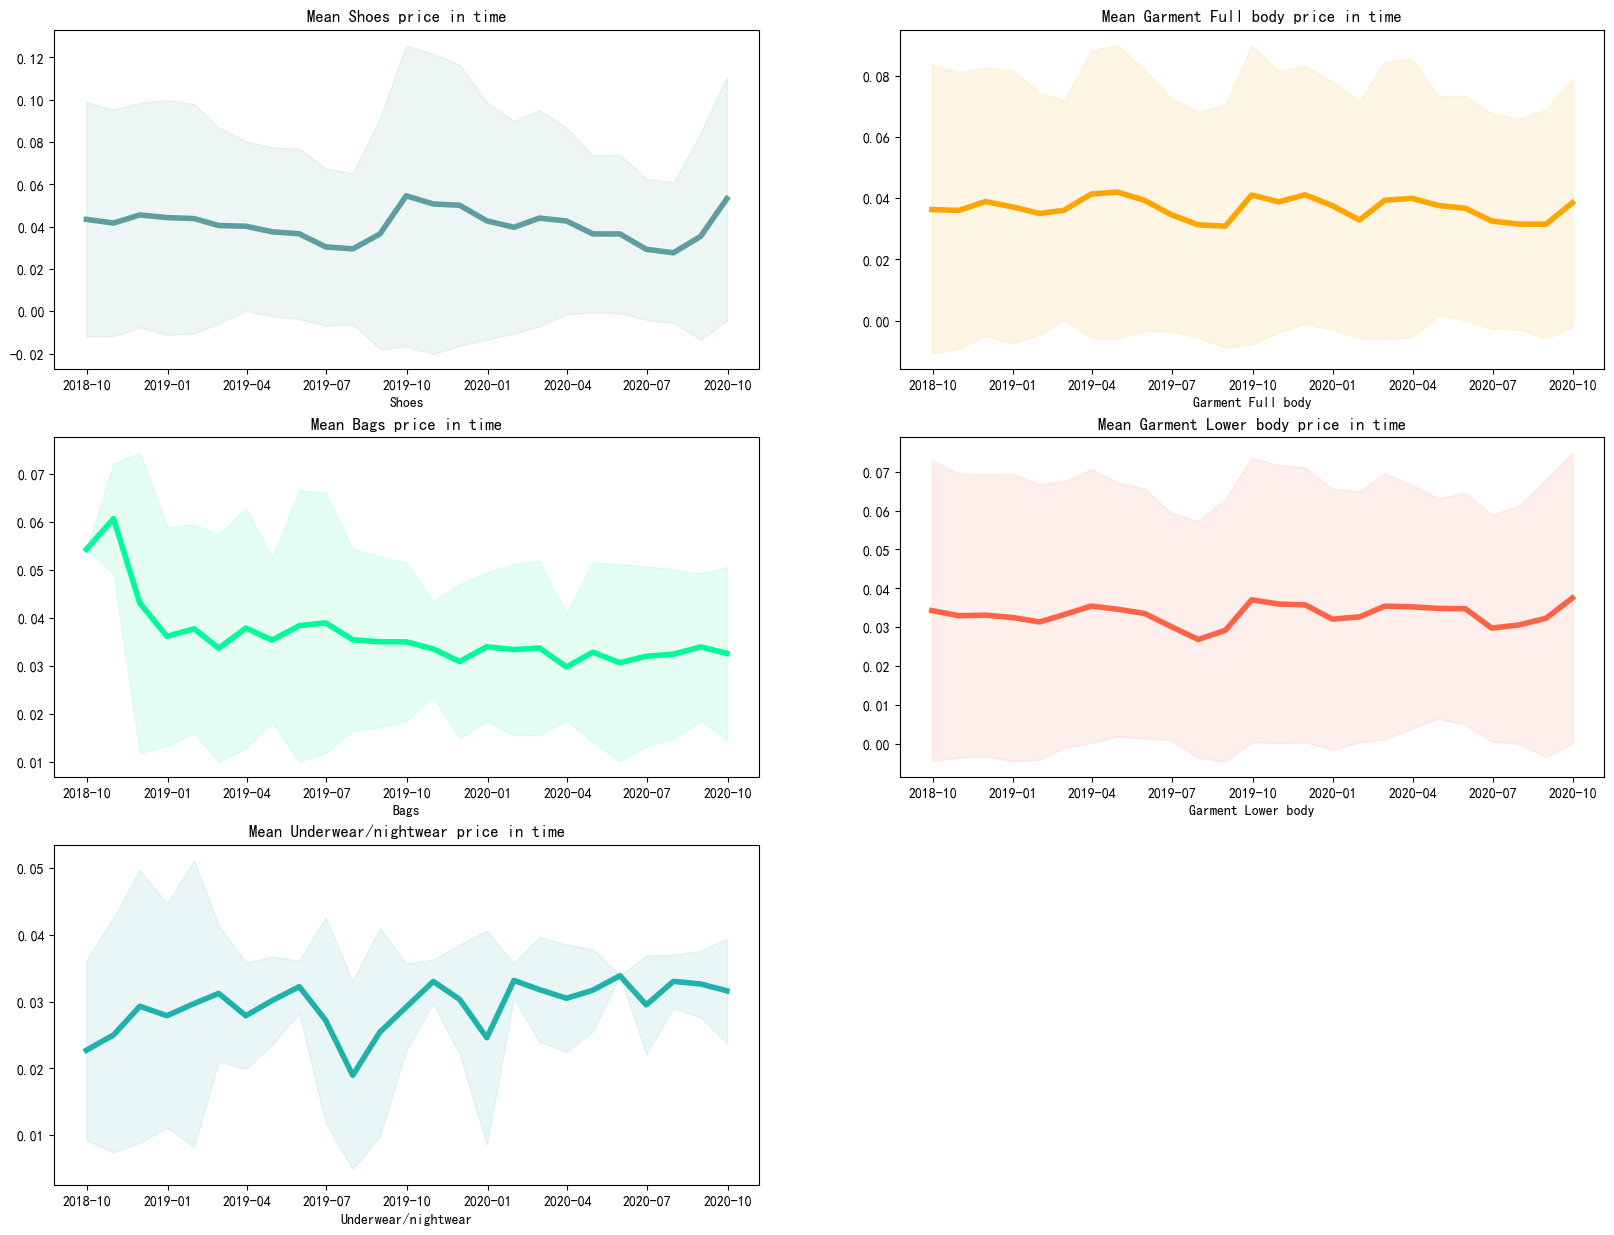

In [29]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

## Images 数据

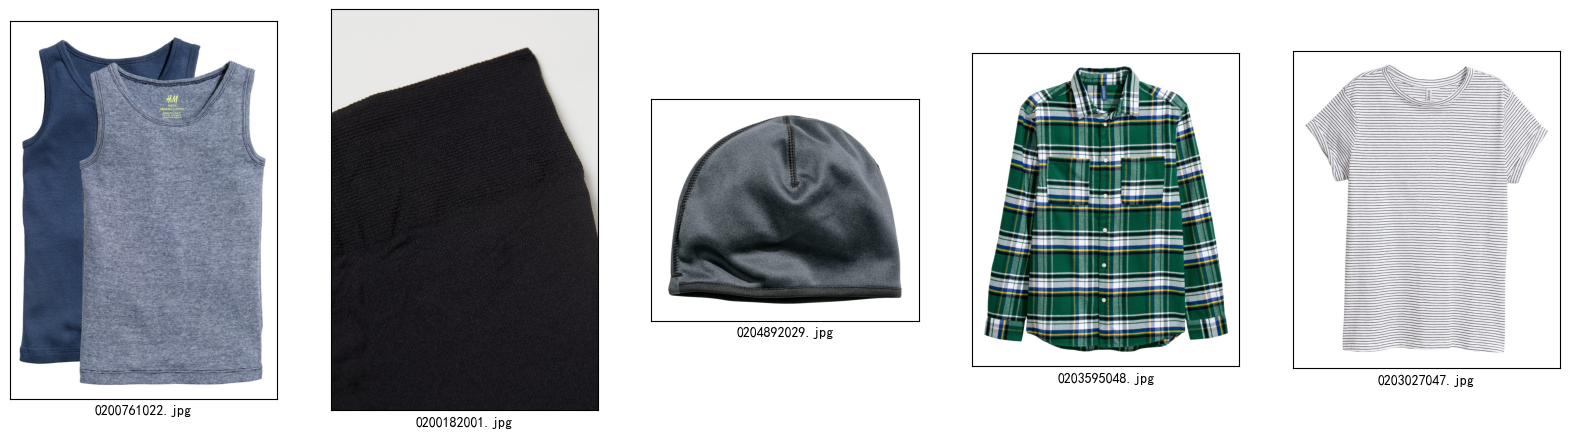

In [50]:
article_list = ['0200761022','0200182001','0204892029','0203595048','0203027047']
fig, ax = plt.subplots(1, len(article_list), figsize=(20,10))

for i, article_id in enumerate(article_list):
    img = mpimg.imread(f'images/020/{article_id}.jpg')
    ax[i].imshow(img)
    ax[i].set_xlabel(f"{article_id}.jpg")
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
plt.show()